In [18]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
from multiprocessing import Pool
import tensorflow as tf
from tensorflow.python.ops import nn


py_file_location = "..."
os.path.abspath(os.path.join(os.path.dirname(py_file_location), os.path.pardir))

from model_DL import *
from functions import *
from metrics import *
from DNN_metrics import *
from data_generator import *
from loss_function import *
from optimization import *



tf.device('GPU:0') 

In [19]:
g_11_tr.shape

(1000000,)

## load dataset

In [20]:
Nbr_train = int(1E6)

Nbr_test = int(2E5) 

# # choose your directory path  
project_sub_path = "Dataset-GIT"
  
# Parent Directory path
parent_dir = ""


### Train ###

dataset_train = np.load(os.path.join(parent_dir,project_sub_path,'dataset_train.npz'))

g_11_tr = dataset_train['g_PP'][:Nbr_train]
g_12_tr = dataset_train['g_PS'][:Nbr_train]
g_1R_tr = dataset_train['g_PR'][:Nbr_train]
g_21_tr = dataset_train['g_SP'][:Nbr_train]
g_22_tr = dataset_train['g_SS'][:Nbr_train]
g_2R_tr = dataset_train['g_SR'][:Nbr_train]
g_R1_tr = dataset_train['g_RP'][:Nbr_train]
g_R2_tr = dataset_train['g_RS'][:Nbr_train]

x_train = np.stack([g_R1_tr, g_11_tr, g_2R_tr, g_1R_tr, g_22_tr, g_R2_tr, g_21_tr, g_12_tr], axis=1)


### Test ### 

dataset_test = np.load(os.path.join(parent_dir,project_sub_path,'dataset_test_2.npz'))


g_11_ts = dataset_test['g_PP'][:Nbr_test]
g_12_ts = dataset_test['g_PS'][:Nbr_test]
g_1R_ts = dataset_test['g_PR'][:Nbr_test]
g_21_ts = dataset_test['g_SP'][:Nbr_test]
g_22_ts = dataset_test['g_SS'][:Nbr_test]
g_2R_ts = dataset_test['g_SR'][:Nbr_test]
g_R1_ts = dataset_test['g_RP'][:Nbr_test]
g_R2_ts = dataset_test['g_RS'][:Nbr_test]

R_S_ts = dataset_test['R_S']
Alpha_ts = dataset_test['Alpha']
P_R_ts = dataset_test['p_R']
P_S_ts = dataset_test['p_S']


x_test = np.stack([g_R1_ts, g_11_ts, g_2R_ts, g_1R_ts, g_22_ts, g_R2_ts, g_21_ts, g_12_ts], axis=1)

y_test = np.stack([R_S_ts, Alpha_ts, P_R_ts, P_S_ts], axis=1)




# Parameters

In [21]:
tau = 0.25

metrics = [Achievable_Rate(tau), QoS_Violation(tau), Primary_Achievable_Rate_Degradation, Primary_ARD_Percentage(tau)] #, QoS_mean_DF, QoS_median_DF

VS = 0.2 # validation_split

Epochs = 1000 # Epochs number

BS = 4096 # batch_size

LD = 10**0.5

LR = 10**-4

DNN_Architecture_choice_dir = "DNN_Architecture_choice"



# Training phase for neurons choice

In [ ]:
# M : 64, 128, 256

M = [64, 128, 256]
for neuron_nbr in M:
    model = archi_neurons_choice(x_train, loss_DF_WN(LD,tau), metrics,'sigmoid', custom_sigmoid, custom_sigmoid, LR, neuron_nbr)
    history = model.fit(x_train, x_train, epochs=Epochs, batch_size=BS, validation_split = VS)#validation_split = VS)
    model.save(DNN_Architecture_choice_dir+str(neuron_nbr)+'.h5')
    np.save(DNN_Architecture_choice_dir+str(neuron_nbr)+'.npy',history.history)



# Training phase for hidden layers choice

In [ ]:
# L : represent the hidden layers number (from 1 to 4 hidden layers)

L = np.arange(1, 5 ,1)

for layer_nbr in L:
    model = archi_neurons_choice(x_train, loss_DF_WN(LD,tau), metrics,'sigmoid', custom_sigmoid, custom_sigmoid, LR, layer_nbr)
    history = model.fit(x_train, x_train, epochs=Epochs, batch_size=BS, validation_split = VS)#validation_split = VS)
    model.save(DNN_Architecture_choice_dir+str(layer_nbr)+'.h5')
    np.save(DNN_Architecture_choice_dir+str(layer_nbr)+'.npy',history.history)




In [37]:
tau = 0.25

hist_one_h_layers = tf.keras.models.load_model('DNN_Architecture_choice1.h5', custom_objects={'DF_loss':loss_DF(Lambda,tau),'Primary_Achievable_Rate_Degradation':Primary_Achievable_Rate_Degradation,'Primary_ARDP':Primary_ARD_Percentage,'throughput':Achievable_Rate(tau),'V_Qos':QoS_Violation(tau), "custom_sigmoid":custom_sigmoid})

hist_two_h_layers = tf.keras.models.load_model('DNN_Architecture_choice2.h5', custom_objects={'DF_loss':loss_DF(Lambda,tau),'Primary_Achievable_Rate_Degradation':Primary_Achievable_Rate_Degradation,'Primary_ARDP':Primary_ARD_Percentage,'throughput':Achievable_Rate(tau),'V_Qos':QoS_Violation(tau), "custom_sigmoid":custom_sigmoid})

hist_three_h_layers = tf.keras.models.load_model('DNN_Architecture_choice3.h5', custom_objects={'DF_loss':loss_DF(Lambda,tau),'Primary_Achievable_Rate_Degradation':Primary_Achievable_Rate_Degradation,'Primary_ARDP':Primary_ARD_Percentage,'throughput':Achievable_Rate(tau),'V_Qos':QoS_Violation(tau), "custom_sigmoid":custom_sigmoid})

hist_four_h_layers = tf.keras.models.load_model('DNN_Architecture_choice128.h5', custom_objects={'DF_loss':loss_DF(Lambda,tau),'Primary_Achievable_Rate_Degradation':Primary_Achievable_Rate_Degradation,'Primary_ARDP':Primary_ARD_Percentage,'throughput':Achievable_Rate(tau),'V_Qos':QoS_Violation(tau), "custom_sigmoid":custom_sigmoid})

hist_half_four_layers = tf.keras.models.load_model('DNN_Architecture_choice64.h5', custom_objects={'DF_loss':loss_DF(Lambda,tau),'Primary_Achievable_Rate_Degradation':Primary_Achievable_Rate_Degradation,'Primary_ARDP':Primary_ARD_Percentage,'throughput':Achievable_Rate(tau),'V_Qos':QoS_Violation(tau), "custom_sigmoid":custom_sigmoid})

hist_double_four_layers = tf.keras.models.load_model('DNN_Architecture_choice256.h5', custom_objects={'DF_loss':loss_DF(Lambda,tau),'Primary_Achievable_Rate_Degradation':Primary_Achievable_Rate_Degradation,'Primary_ARDP':Primary_ARD_Percentage,'throughput':Achievable_Rate(tau),'V_Qos':QoS_Violation(tau), "custom_sigmoid":custom_sigmoid})


predictions_1 = hist_one_h_layers.predict(x_test)
predictions_2 = hist_two_h_layers.predict(x_test)

predictions_3 = hist_three_h_layers.predict(x_test)
predictions_4 = hist_four_h_layers.predict(x_test)


predictions_half = hist_half_four_layers.predict(x_test)
predictions_double = hist_double_four_layers.predict(x_test)


In [38]:
def stats(test_set, gt_test, y_hat):
    # debit true_test
    debit_hat_test = rate(test_set[:,0], test_set[:,1], test_set[:,2], test_set[:,3],test_set[:,4], test_set[:,5], test_set[:,6], test_set[:,7], y_hat[:,0], y_hat[:,1], y_hat[:,2])
    debit_true_test = np.stack((test_set[:,0], test_set[:,1], test_set[:,2], test_set[:,3],test_set[:,4], test_set[:,5], test_set[:,6], test_set[:,7], gt_test[:,0], np.sqrt(gt_test[:,1]), np.sqrt(gt_test[:,2]), np.sqrt(gt_test[:,3])), axis=1)

    debit_gap = relative_avreage_gap(debit_hat_test[:,8], debit_true_test[:,8]) #[:,7] : extracting debit from ND array

    tau_violation_count = Tau_Violation_Number(test_set[:,0], test_set[:,1], test_set[:,6], y_hat[:,0], y_hat[:,1], y_hat[:,2]) 
    viloated_tau = Tau_Violation_percentage(test_set, tau_violation_count)

    ard_mean = ARD_mean(test_set[:,0], test_set[:,1], test_set[:,6], y_hat[:,0], y_hat[:,1], y_hat[:,2])

    # min, max, mean and std  for primary debit degradation
    pdd_vmax =  pdd_max(test_set[:,0], test_set[:,1], test_set[:,6], y_hat[:,0], y_hat[:,1], y_hat[:,2])
    pdd_vmean = pdd_mean(test_set[:,0], test_set[:,1], test_set[:,6], y_hat[:,0], y_hat[:,1], y_hat[:,2])

    return debit_gap, viloated_tau, pdd_vmean, pdd_vmax, ard_mean 



rate_gap_one_hlayers, outage_one_hlayers, pnd_average_one_hlayers, pnd_max_one_hlayers, delta_out_one_hlayers = stats(x_test, y_test, predictions_1)
rate_gap_two_hlayers, outage_two_hlayers, pnd_average_two_hlayers, pnd_max_two_hlayers, delta_out_two_hlayers = stats(x_test, y_test, predictions_2)
rate_gap_three_hlayers, outage_three_hlayers, pnd_average_three_hlayers, pnd_max_three_hlayers, delta_out_three_hlayers = stats(x_test, y_test, predictions_3)
rate_gap_four_hlayers, outage_four_hlayers, pnd_average_four_hlayers, pnd_max_four_hlayers, delta_out_four_hlayers = stats(x_test, y_test, predictions_4)

rate_gap_half_hlayers, outage_half_hlayers, pnd_average_half_hlayers, pnd_max_half_hlayers, delta_out_half_hlayers = stats(x_test, y_test, predictions_half)

rate_gap_double_hlayers, outage_double_hlayers, pnd_average_double_hlayers, pnd_max_double_hlayers, delta_out_double_hlayers = stats(x_test, y_test, predictions_double)



In [39]:
rate_gap_layers = np.stack([[rate_gap_one_hlayers],[rate_gap_two_hlayers],[rate_gap_three_hlayers],[rate_gap_four_hlayers]])

outage_layers = np.stack([[outage_one_hlayers],[outage_two_hlayers],[outage_three_hlayers],[outage_four_hlayers]])

rate_gap_neurons = np.stack([[rate_gap_half_hlayers], [rate_gap_four_hlayers], [rate_gap_double_hlayers]])

outage_neurons = np.stack([ [outage_half_hlayers], [outage_four_hlayers],[outage_double_hlayers]])




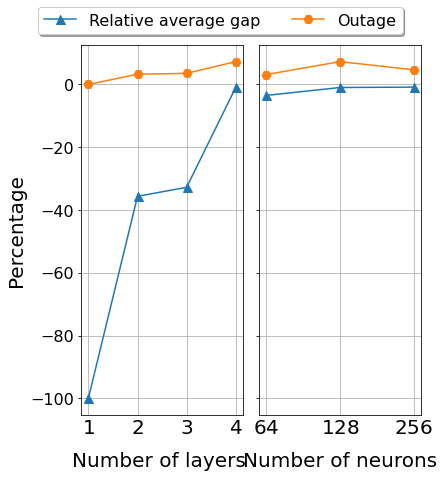

In [40]:
ref = [1, 3, 5, 7]

ref_2 = [1, 4, 7]


fig, ax = plt.subplots(1, 2, constrained_layout=True, sharex=False, sharey=True) # , figsize=(10, 5)

fig.set_figheight(6, 15)

#-------------- First Plot --------------#
ax[0].grid()

ax[0].plot(ref, rate_gap_layers*100, label='Relative average gap', marker='^',markersize=9)

ax[0].plot(ref, outage_layers, label = 'Outage', marker='H', markersize=9)

ax[0].set_xlabel("Number of layers ", fontsize= 20, labelpad=14)

ax[0].set_ylabel(r'Percentage', fontsize= 20)

ax[0].set_xticks(ref)

ax[0].tick_params(labelsize=16)

ax[0].set_xticklabels(["$1$", "$2$", "$3$", "$4$"], fontsize=20)
ax[0].tick_params(axis="x", which="both", length=0.)
ax[0].xaxis.set_label_coords(0.5, -0.1)



#-------------- Second Plot --------------#


ax[1].grid()

ax[1].plot(ref_2, rate_gap_neurons*100, marker='^', markersize=9)

ax[1].plot(ref_2, outage_neurons, marker='H', markersize=9)

ax[1].set_xticks(ref_2)

ax[1].set_xticklabels([r'$64$', "$128$", '$256$'], fontsize=20)


ax[1].set_xlabel("Number of neurons", fontsize= 20)


ax[1].tick_params(axis="x", which="both", length=0.)
ax[1].xaxis.set_label_coords(0.5, -0.1)


fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
          ncol=3, fancybox=True, shadow=True, fontsize= 16)

plt.savefig('archi_plot.pdf', bbox_inches='tight')

plt.show()




In [31]:
#params = 'loss'

#one_h_layers = np.load('Data/data layers/weights_1000_epoch/1_hlayers.npy',allow_pickle='TRUE').item()[params][-1]

#two_h_layers = np.load('Data/data layers/weights_1000_epoch/2_hlayers.npy',allow_pickle='TRUE').item()[params][-1]

#three_h_layers = np.load('Data/data layers/weights_1000_epoch/3_hlayers.npy',allow_pickle='TRUE').item()[params][-1]

#four_h_layers = np.load('Data/data layers/weights_1000_epoch/4_hlayers.npy',allow_pickle='TRUE').item()[params][-1]

#half_four_layers = np.load('Data/data layers/weights_1000_epoch/half_4_hlayers.npy',allow_pickle='TRUE').item()[params][-1]

#double_four_layers = np.load('Data/data layers/weights_1000_epoch/double_4_hlayers.npy',allow_pickle='TRUE').item()[params][-1]
